In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from hdbscan import HDBSCAN
from itertools import chain
from joblib import dump,load

In [2]:
dfx = pd.read_csv('./molecule_open_data/candidate_train.csv')
dfx = dfx.set_index('id')

dfy = pd.read_csv('./molecule_open_data/train_answer.csv')
dfy = dfy.set_index('id')

In [3]:
df1 = dfx.join(dfy)

In [4]:
df = df1[df1.columns[-16:]]

In [5]:
u = UMAP(min_dist = 0.0, n_neighbors = 50)
xy = u.fit_transform(df)

/home/SuYee/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/SuYee/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.local/lib/python3.6/site-packages/umap/utils.py"

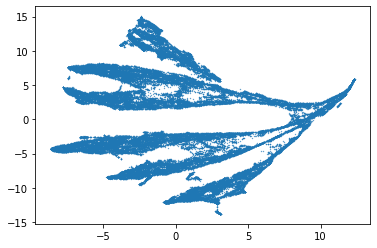

In [65]:
plt.scatter(xy[:,0],  xy[:,1], s=0.1, cmap='Spectral')

In [34]:
labels = HDBSCAN(min_samples=100,min_cluster_size=200).fit_predict(xy)

In [35]:
pd.Series(labels).value_counts()

 5     14221
 3     11737
 1     10671
 7     10149
 4      9793
 12     9147
-1      6044
 6      1979
 15      818
 8       772
 16      767
 11      701
 9       659
 10      576
 13      469
 14      284
 2       276
 0       204
dtype: int64

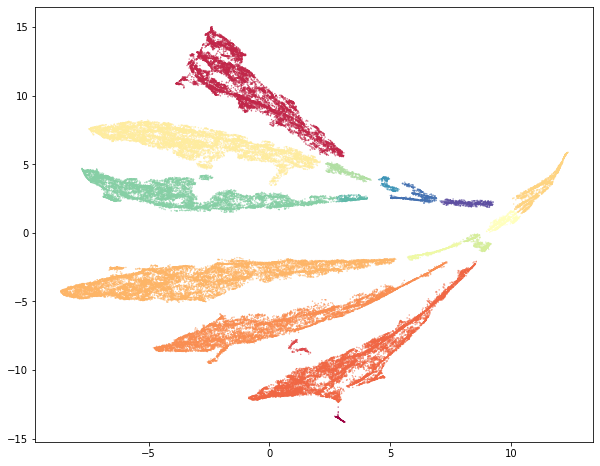

In [71]:
f, ax = plt.subplots(1,1, figsize=(10,8))

clustered = (labels >= 0)
# plt.scatter(xy[~clustered, 0],
#             xy[~clustered, 1],
#             c=(0.5, 0.5, 0.5),
#             s=0.1,
#             alpha=0.5)

plt.scatter(xy[clustered, 0],
            xy[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

plt.savefig('./cluster.png', bbox_inches="tight", dpi = 300)

In [64]:
df['class'] = labels

/home/SuYee/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
def sample(x):
    
    if x['class'].iloc[0] == -1 :
        res = []
    else:
        p = len(x) / len(df)
        res = x.sample(frac = p, random_state = 123).index.to_list()
    return res

In [75]:
df = df.reset_index()
list2d = df.groupby('class').apply(sample).to_list()
valid_idx = list(chain(*list2d))

In [76]:
train_idx = list(set(df.index) -set(valid_idx))

In [77]:
len(train_idx), len(valid_idx)

(69883, 9384)

In [78]:
dump((train_idx, valid_idx), 'train_valid_idx.ind')

['train_valid_idx.ind']